In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
#import cartopy.crs as ccrs


from salishsea_tools import visualisations as vis
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')


*very* quick notes: 
- DIC slightly lower than domain average may be expected due to lots of freshwater.
- freshwater decreases anthropogenic signal via dilution in january (fuchsia/seattle station)
- the opposite is true in july for both Seattle(fuchsia) and port townsend ( dark purple) stations
- straightness of port townsend station could be attributed to less freshwater. 
- two things act to decrease DIC in the surface: freshwater dilution and phytoplankton drawdown. Both are visible here. 
- anthropogenic DIC is calculated between BR3 and PI7 runs - PI7 run still has spinning up to do....


In [38]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [3]:
#open bathymetry grid
grid = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
meshmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

BR3_DIC_winter = pickle.load(open('../pkls/BR3_DIC_winter_mean.pkl', 'rb'))  
BR3_DIC_summer = pickle.load(open('../pkls/BR3_DIC_summer_mean.pkl', 'rb'))
BR3_DIC_fullyear_mean = pickle.load(open('../pkls/BR3_DIC_fullyear_mean.pkl', 'rb'))
BR3_sal_summer = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb')) 
#BR3_DIC_fullyear_mean

Text(0.5, 1.0, 'individual stations')

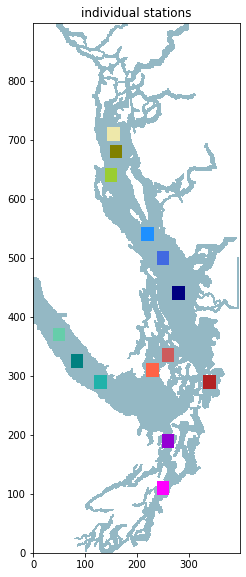

In [4]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'

ps_x = 250; ps_y = 110; ps_col = 'magenta'
ps2_x = 260; ps2_y = 190; ps2_col = 'darkviolet'
# ps2_x = 
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

rect_ps = Rectangle((ps_x-10,ps_y-10),20,20,linewidth=2,edgecolor=ps_col,facecolor=ps_col)
ax0.add_patch(rect_ps)
rect_ps = Rectangle((ps2_x-10,ps2_y-10),20,20,linewidth=2,edgecolor=ps2_col,facecolor=ps2_col)
ax0.add_patch(rect_ps)


ax0.set_title('individual stations')



In [40]:
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 
#BR3_var[BR3_var == 0] = np.nan
PI7_var = pickle.load(open('../pkls/PI7_DIC_means_inletsIN.pkl' , 'rb')) 
#PI7_var[PI7_var == 0] = np.nan

BR3_dp = np.nanmean(BR3_var, axis =1)
PI7_dp = np.nanmean(PI7_var, axis =1)

BR3_var_ps = pickle.load(open('../pkls/BR3_DIC_means_ps_BOX.pkl','rb'))
PI7_var_ps = pickle.load(open('../pkls/PI7_DIC_means_ps_BOX.pkl','rb'))
BR3_var_ps2 = pickle.load(open('../pkls/BR3_DIC_means_ps2_BOX.pkl','rb'))
PI7_var_ps2 = pickle.load(open('../pkls/PI7_DIC_means_ps2_BOX.pkl','rb'))


PI7_ps_dp = np.nanmean(PI7_var_ps, axis =1)
PI7_ps2_dp = np.nanmean(PI7_var_ps2, axis =1)
BR3_ps_dp = np.nanmean(BR3_var_ps, axis =1)
BR3_ps2_dp = np.nanmean(BR3_var_ps2, axis =1)

PI7_ps_dp_jan = np.nanmean(PI7_var_ps[:,0:30], axis =1)
PI7_ps2_dp_jan = np.nanmean(PI7_var_ps2[:,0:30], axis =1)
BR3_ps_dp_jan = np.nanmean(BR3_var_ps[:,0:30], axis =1)
BR3_ps2_dp_jan = np.nanmean(BR3_var_ps2[:,0:30], axis =1)

PI7_ps_dp_jul = np.nanmean(PI7_var_ps[:,180:210], axis =1)
PI7_ps2_dp_jul = np.nanmean(PI7_var_ps2[:,180:210], axis =1)
BR3_ps_dp_jul = np.nanmean(BR3_var_ps[:,180:210], axis =1)
BR3_ps2_dp_jul = np.nanmean(BR3_var_ps2[:,180:210], axis =1)

BR3_dp_jan = np.nanmean(BR3_var[:,0:30], axis =1)
PI7_dp_jan = np.nanmean(PI7_var[:,0:30], axis =1)

BR3_dp_jul = np.nanmean(BR3_var[:,180:210], axis =1)
PI7_dp_jul = np.nanmean(PI7_var[:,180:210], axis =1)

In [11]:
np.shape(BR3_var)

(40, 365)

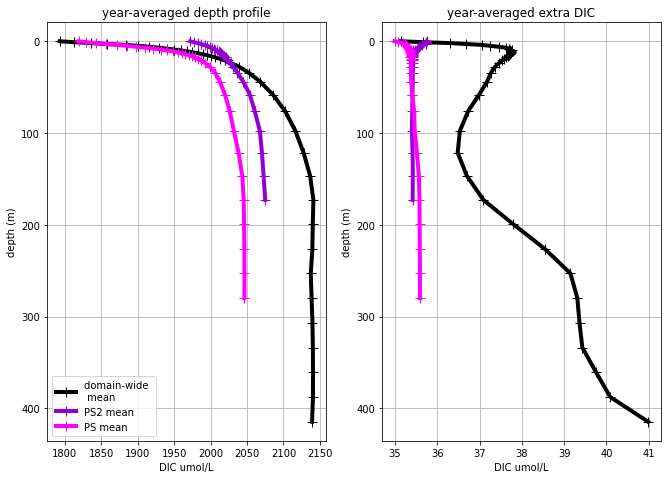

In [37]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]  
## plotting
fact = 0.55
fig, axs = plt.subplots(1,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()



axs[1].plot(BR3_dp-PI7_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')
axs[1].plot(BR3_ps2_dp-PI7_ps2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps2_col,\
         markersize = 10, label = 'PS2 mean')
axs[1].plot(BR3_ps_dp-PI7_ps_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps_col,\
         markersize = 10, label = 'PS mean')

axs[0].plot(BR3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')
axs[0].plot(BR3_ps2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps2_col,\
         markersize = 10, label = 'PS2 mean')
axs[0].plot(BR3_ps_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps_col,\
         markersize = 10, label = 'PS mean')

for i in range(0,2):
    axs[i].invert_yaxis(); axs[i].grid();
    axs[i].set_ylabel('depth (m)'); axs[i].set_xlabel('DIC umol/L')
    
axs[0].set_title('year-averaged depth profile')    
axs[1].set_title('year-averaged extra DIC')  
axs[0].legend()

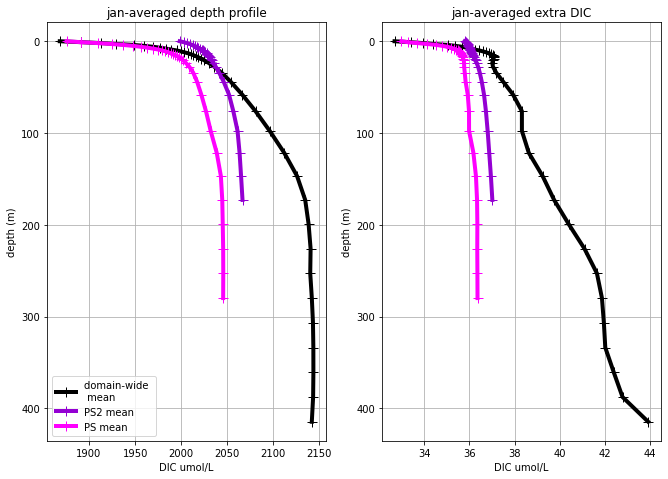

In [41]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]  
## plotting
fact = 0.55
fig, axs = plt.subplots(1,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()



axs[1].plot(BR3_dp_jan-PI7_dp_jan,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')
axs[1].plot(BR3_ps2_dp_jan-PI7_ps2_dp_jan,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps2_col,\
         markersize = 10, label = 'PS2 mean')
axs[1].plot(BR3_ps_dp_jan-PI7_ps_dp_jan,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps_col,\
         markersize = 10, label = 'PS mean')

axs[0].plot(BR3_dp_jan,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')
axs[0].plot(BR3_ps2_dp_jan,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps2_col,\
         markersize = 10, label = 'PS2 mean')
axs[0].plot(BR3_ps_dp_jan,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps_col,\
         markersize = 10, label = 'PS mean')

for i in range(0,2):
    axs[i].invert_yaxis(); axs[i].grid();
    axs[i].set_ylabel('depth (m)'); axs[i].set_xlabel('DIC umol/L')
    
axs[0].set_title('jan-averaged depth profile')    
axs[1].set_title('jan-averaged extra DIC')  
axs[0].legend()

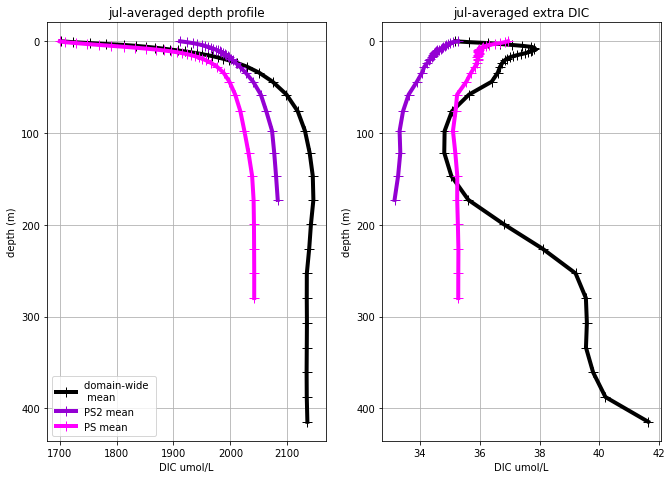

In [42]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]  
## plotting
fact = 0.55
fig, axs = plt.subplots(1,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()



axs[1].plot(BR3_dp_jul-PI7_dp_jul,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')
axs[1].plot(BR3_ps2_dp_jul-PI7_ps2_dp_jul,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps2_col,\
         markersize = 10, label = 'PS2 mean')
axs[1].plot(BR3_ps_dp_jul-PI7_ps_dp_jul,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps_col,\
         markersize = 10, label = 'PS mean')

axs[0].plot(BR3_dp_jul,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')
axs[0].plot(BR3_ps2_dp_jul,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps2_col,\
         markersize = 10, label = 'PS2 mean')
axs[0].plot(BR3_ps_dp_jul,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = ps_col,\
         markersize = 10, label = 'PS mean')

for i in range(0,2):
    axs[i].invert_yaxis(); axs[i].grid();
    axs[i].set_ylabel('depth (m)'); axs[i].set_xlabel('DIC umol/L')
    
axs[0].set_title('jul-averaged depth profile')    
axs[1].set_title('jul-averaged extra DIC')  
axs[0].legend()